In [ ]:
#importing libraries

import pandas as pd

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

#libraries for k-means

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [1]:
#Loading the data

data = pd.read_csv("preprocessed_data.csv")
data.head()

,Unnamed: 0,user_description,text,clean,lower,textokenized,nostopwords,lemmatized,lemma_str,final_text
0,0,moderator,imuhammetyildiz is now live! streaming just ch...,imuhammetyildiz is now live streaming just cha...,imuhammetyildiz is now live streaming just cha...,"['imuhammetyildiz', 'is', 'now', 'live', 'stre...","['is', 'now', 'live', 'streaming', 'just', 'ch...","['iş', 'now', 'live', 'stream', 'just', 'chatt...",iş now live stream just chatting tak takmak yt,"['iş', 'now', 'live', 'stream', 'just', 'chatt..."
1,1,moderator,mrdestructoid @imuhammetyildiz it seems like y...,mrdestructoid imuhammetyildiz it seems like yo...,mrdestructoid imuhammetyildiz it seems like yo...,"['mrdestructoid', 'imuhammetyildiz', 'it', 'se...","['mrdestructoid', 'it', 'seems', 'like', 'your...","['mrdestructoid', 'itmek', 'şems', 'like', 'yo...",mrdestructoid itmek şems like you sound alerts...,"['mrdestructoid', 'itmek', 'şems', 'like', 'yo..."
2,2,3-month subscriber,slm mamiş,slm mamiş,slm mamiş,"['slm', 'mamiş']",[],[],NaN,[]
3,3,vip,alooooooo,alooooooo,alooooooo,['alooooooo'],['alooooooo'],['alooooooo'],alooooooo,['alooooooo']
4,4,3-month subscriber,alo,alo,alo,['alo'],[],[],NaN,[]


In [2]:

nltk.download ('stopwords')
#Stop words present in the library
stops = nltk.corpus.stopwords.words('turkish')
newstops = ['sa','as', 'cisillll', 'pquraen', 'al', 'mis', 'bent', 'imuhamopustuk', 'senin', 'sen', 'onu', 'darkholmee', 'x', 'mu', 'ay', 'naber', 'imuhamiys', 'olur', 'selam', 'insta', 'httpswwwinstagramcomimuhammetyildizhltr', 'haydaaaa', 'hellllooo', 'hellooo', 'hellooooo', 'heee', 'şey', 'haydaaaaaaa', 'haydaaaaaaaa', 'am', 'da', 'daha', 'iyi', 'napalion7', 'bi', 'bosver', 'imuhamalo', 'napalion', 'merhaba', 'httpswwwyoutubecomchannelucstjlfccjuguahupwssiww', 'tutodvrm', 'lul', 'on',  'slm', 'aa', 'şş', 'aaa', 'aaaa', 'aaaaaa', 'aaaaaaa', 'mamiş', 'D', 'çok', 'az', 'neyse', 'falcon2kkalp', 'httpsdiscordggrdj7hxmvgy', ' falcon2kkalp', 'the', 'idil', 'bu', 'httpsdiscordggrdj7hxmvgy', 'neyse', 'ya', 'ne', 'nympea', 'at', 'ays', 'burcinvr', 'san', 'sela', 'değil', 'tutodurm', 'ah', 'be', 'kerema5keremkalp','sö', 'falan', 'bc', 'dc', 'he', 'up', 'aq', 'fizy', '10', 'su', 'nim', 'efe', 'hee', 'hb', 'a', 'gsyi', 'ad', 'ha', 'ner', 'berra', 'hg', 'cafercan3125', 'ayn', 'amk', 'do', 'fa', 'alt','var', 'ba', 'ronaldo', 'ara', 'ada', 'mami', 'bura', 'on', 'fa', 'bb', 'ge', 'ab', 'btw', 'mk', 'pek','Kerem','Keremakdemirr', 'keremakdemirr', 'kere', 'ays055', 'burçin', 'imühamiys', 'mi', 'aç', 'httpswwwyoutubecomchanneluçstjlfçcjuguahupwssiww', 'nympeadansdans','kerem', 'httpsyoutubevsr46l41bru', 'httpswwwinstagramcomkeremakdemirr', 'cafer', 'cüneyt','e', 'i', '5', 'lan', 'la', 'se', 'd', '3', '1', 'bir', 'cafer', 'yay', 'imuhammetyildiz', 'muhamed','deniz', 'Deniz', 'nympea', 'imuhaiys', 'alo', 'evet', 'hayir', 'yok', 'oha']
stops.extend(newstops)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 4000,
    stop_words = stops
)
tfidf.fit(data.nostopwords)
text = tfidf.transform(data.final_text)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


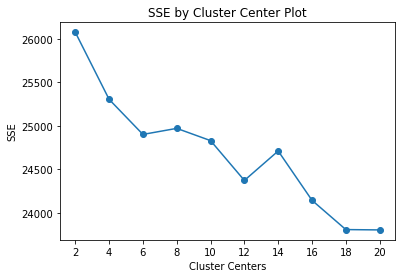

In [5]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [26]:
clusters = MiniBatchKMeans(n_clusters=6, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


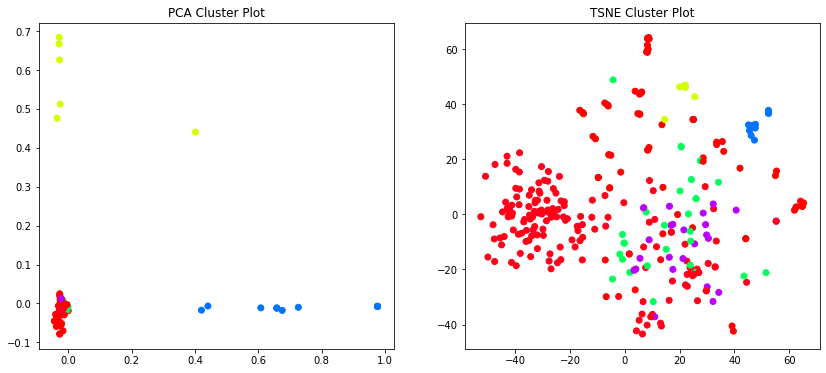

In [27]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].toarray())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].toarray()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [28]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.toarray()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Cluster 0
gitmek,izlemek,kız,söylemek,abla,etmek,yemek,kanka,yapmak,abi

Cluster 1
sak,yapmak,etmek,keşke,gün,güzel,aşık,kanka,demek,olmak

Cluster 2
yan,aynı,gece,para,tabi,noldu,kafa,aynen,chat,baba

Cluster 3
doğru,ön,sonra,aşk,abla,abi,kanka,kız,yapmak,demek

Cluster 4
üst,fazla,yiğit,olay,oluyor,hello,bul,almak,şaka,hoş

Cluster 5
böyle,doğru,allah,kal,işte,herkes,xd,ora,teşekkür,alaka
